In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
path = 'C:/Life/Career and Degrees - REPO/B.M -Degree/Year2SemesterB/Data Anaysis/Exam prep/Tigbur files/BEFORE EXAM MAIN/AllData.xlsx'
Data = pd.read_excel(path,sheet_name = 'Sales')
Data.head()

,DateKey,ChannelKey,StoreKey,UnitCost,UnitPrice,SalesQuantity,Product ID,Supplier ID
0,2008-10-11,4,77,165.6,184,18,29,14
1,2008-05-01,4,158,151.2,168,20,69,2
2,2007-10-26,4,3,35.1,39,7,22,18
3,2007-04-05,1,81,110.7,123,3,41,5
4,2007-04-16,1,77,51.3,57,10,48,29


In [7]:
Suppliers = pd.read_excel(path,sheet_name='Suppliers')
Suppliers.head()

,Supplier ID,Company Name,Contact Name,Contact Title,City,Country
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,New Orleans,USA
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,Ann Arbor,USA
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,Tokyo,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Oviedo,Spain


In [8]:
cond1 = Data['DateKey'].dt.month==4
cond2 = Data['DateKey'].dt.month==5
res = Data.loc[ cond1 | cond2 ]
res.head()

,DateKey,ChannelKey,StoreKey,UnitCost,UnitPrice,SalesQuantity,Product ID,Supplier ID
1,2008-05-01,4,158,151.2,168,20,69,2
3,2007-04-05,1,81,110.7,123,3,41,5
4,2007-04-16,1,77,51.3,57,10,48,29
6,2007-04-24,1,5,145.8,162,19,18,24
7,2007-05-23,3,72,146.7,163,14,31,20


In [9]:
Data['Pidyon/Turnover'] = Data['SalesQuantity'] * Data['UnitPrice']
Data['Revakh/Profit'] = Data['SalesQuantity'] * (Data['UnitPrice'] - Data['UnitCost'])
Data['Yahas Rivhiut/Profitability ratio'] =   Data['Revakh/Profit']/Data['Pidyon/Turnover'] 
NewData = Data[['UnitCost','UnitPrice','SalesQuantity','Supplier ID','Pidyon/Turnover','Revakh/Profit','Yahas Rivhiut/Profitability ratio']] 
NewData.head()

,UnitCost,UnitPrice,SalesQuantity,Supplier ID,Pidyon/Turnover,Revakh/Profit,Yahas Rivhiut/Profitability ratio
0,165.6,184,18,14,3312,331.2,0.1
1,151.2,168,20,2,3360,336.0,0.1
2,35.1,39,7,18,273,27.3,0.1
3,110.7,123,3,5,369,36.9,0.1
4,51.3,57,10,29,570,57.0,0.1


In [10]:
NewSuppliers = Suppliers[['Supplier ID','Company Name','Country']]
NewSuppliers.head()

,Supplier ID,Company Name,Country
0,1,Exotic Liquids,UK
1,2,New Orleans Cajun Delights,USA
2,3,Grandma Kelly's Homestead,USA
3,4,Tokyo Traders,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Spain


In [11]:
sonk = pd.merge(NewSuppliers,NewData,on='Supplier ID')
sonk.head()

,Supplier ID,Company Name,Country,UnitCost,UnitPrice,SalesQuantity,Pidyon/Turnover,Revakh/Profit,Yahas Rivhiut/Profitability ratio
0,1,Exotic Liquids,UK,122.4,136,18,2448,244.8,0.1
1,1,Exotic Liquids,UK,55.8,62,19,1178,117.8,0.1
2,1,Exotic Liquids,UK,102.6,114,12,1368,136.8,0.1
3,1,Exotic Liquids,UK,14.4,16,19,304,30.4,0.1
4,1,Exotic Liquids,UK,113.4,126,21,2646,264.6,0.1


<AxesSubplot:xlabel='Country', ylabel='count'>

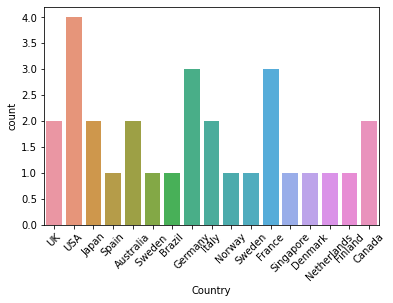

In [20]:
n=sns.countplot(x='Country',data=Suppliers)
n.set_xticklabels(n.get_xticklabels(), rotation=45)
n

In [29]:
tok = sonk.groupby(['Country']).sum()[['Pidyon/Turnover','Revakh/Profit']]
tok

,Pidyon/Turnover,Revakh/Profit
Country,,
Australia,119794,19670.45
Brazil,72254,11915.85
Canada,134743,21931.19
Denmark,68469,11294.10
Finland,33703,5401.07
France,209718,34371.39
Germany,173246,28577.71
Italy,127562,20543.39
Japan,108603,18053.52
